In [1]:
%matplotlib inline

In [2]:
import sys
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [4]:
nb_data_root = '/data/nb_data/datasets'

In [5]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [6]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [7]:
X_train, y_train = load_mnist(os.path.join(nb_data_root, 'FashionMNIST/raw'))

In [8]:
X_train.shape

(60000, 784)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

print(np.unique(y_subset))
x_subset.shape

[0 1 2 3 4 5 6 7 8 9]


(20000, 784)

## PCA

In [11]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)
print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864]


In [12]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

In [13]:
pca_df[:10]

,pca1,pca2,pca3,pca4
0,-136.290158,1637.696361,-1197.696214,264.451772
1,1411.746416,-433.469787,-242.041500,352.526108
2,-712.785768,-1110.565511,103.583339,208.557283
3,41.849430,-982.961224,207.104319,372.425111
4,821.291729,-1188.578847,-742.329514,-276.548144
5,1172.521090,511.778570,617.769295,91.678762
6,-1491.311151,328.603179,149.908217,-786.089635
7,1808.802985,1691.415692,324.494854,-436.560476
8,-1579.497048,-405.686375,115.111091,1013.461467
9,-949.952793,402.745457,-45.933794,1408.164144


In [14]:
top_two_comp = pca_df[['pca1','pca2']]

(<Figure size 576x576 with 1 Axes>,
 [Text(774.4497664215968, -689.6949155592816, '0'),
  Text(42.86381926025619, -1429.3643908396396, '1'),
  Text(1098.2843326496513, 376.97532329110106, '2'),
  Text(329.27198606844235, -1111.4898090664426, '3'),
  Text(1266.970986825532, 295.46620083328537, '4'),
  Text(-1589.5573233911414, 61.867733927647805, '5'),
  Text(713.4727983676903, -65.68701122665792, '6'),
  Text(-1521.4109429513583, 335.6656253244972, '7'),
  Text(63.81768171717415, 1003.3250404676847, '8'),
  Text(-645.6906091280005, 1168.2384038923367, '9')])

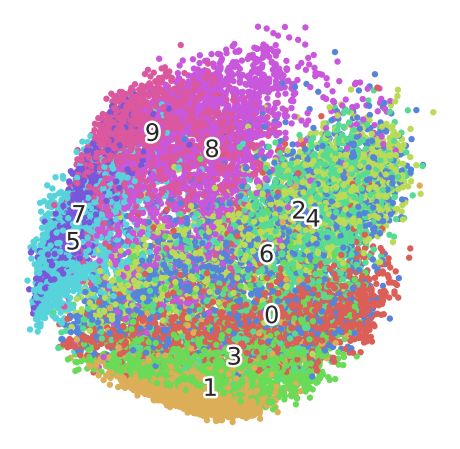

In [15]:
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

## TSNE

In [ ]:
fashion_tsne = TSNE(random_state=21).fit_transform(x_subset)

In [ ]:
fashion_scatter(fashion_tsne, y_subset)

## PCA and TSNE

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)
fashion_pca_tsne = TSNE(random_state=21).fit_transform(pca_result_50)
fashion_scatter(fashion_pca_tsne, y_subset)

In [ ]:



https://github.com/kienvu58/chord-sequence-modelling/blob/c1f6e26d16c1089c1336fd0492731d477e8cdea0/refactor/visualize_embeddings.py